In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get all files in the current directory
files = os.listdir('.')
# filter for CSV files
csv_files = [f for f in files if f.endswith('.csv')]
# create a list to hold DataFrames
dataframes = []
# read each CSV file into a DataFrame and append to the list
for csv_file in csv_files:
    if "encoder" in csv_file or "trick" in csv_file:
        continue
    df = pd.read_csv(csv_file)
    dataframes.append([csv_file, df])
len(dataframes)

16

In [3]:
for csv_file, df in dataframes:
    df["dataset"] = csv_file.split("_")[-1].replace(".csv", "")
    df["model"] = csv_file.split("_")[-2]

In [4]:
df_main = pd.concat([df for _, df in dataframes], ignore_index=True)

In [5]:
mapping = {"master-mini": 10_000_000, "master-small": 20_000_000, "master-medium": 50_000_000, "master-large": 100_000_000}
df_main["dataset_size"] = df_main["dataset"].map(mapping)

In [6]:
color_map = {
    "mini": "#00BFFF",     # Vivid Deep Sky Blue
    "small": "#1E90FF",    # Vivid Dodger Blue
    "medium": "#0000CD",   # Vivid Medium Blue
    "large": "#00008B"     # Vivid Dark Blue
}

In [7]:
color_map_ds = {
    "master-mini": "#00BFFF",     # Vivid Deep Sky Blue
    "master-small": "#1E90FF",    # Vivid Dodger Blue
    "master-medium": "#0000CD",   # Vivid Medium Blue
    "master-large": "#00008B"     # Vivid Dark Blue
}

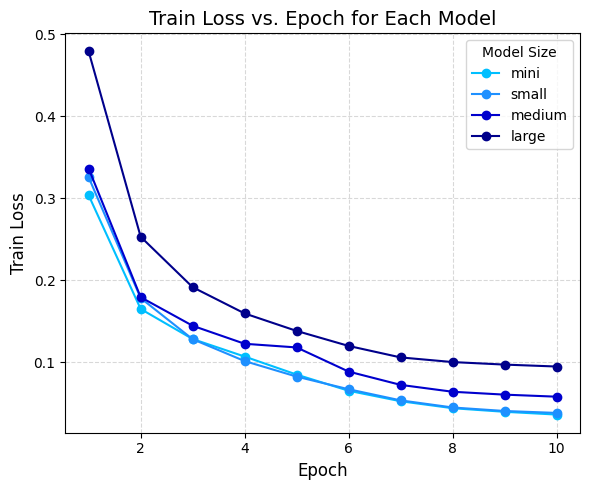

In [8]:
import matplotlib.pyplot as plt

model_order = ["mini", "small", "medium", "large"]

grouped = df_main.groupby(["model", "epoch"])["train_loss"].mean().reset_index()

plt.figure(figsize=(6, 5))
for model_name in model_order:
    model_data = grouped[grouped["model"] == model_name]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model_name,
            color=color_map[model_name]
        )

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each Model", fontsize=14)
plt.legend(fontsize=10, title="Model Size")
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.tight_layout()
plt.show()


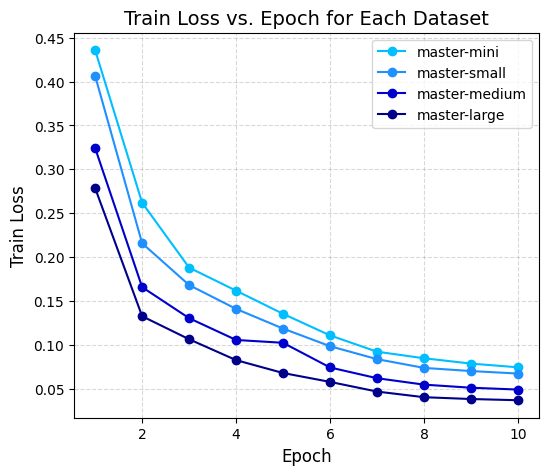

In [9]:
grouped = df_main.groupby(["dataset", "epoch"])["train_loss"].mean().reset_index()

ds_order = ["master-mini", "master-small", "master-medium", "master-large"]

plt.figure(figsize=(6, 5))
for ds_name in ds_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["dataset"] == ds_name]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=ds_name,
            color=color_map_ds[ds_name]
        )
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each Dataset", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

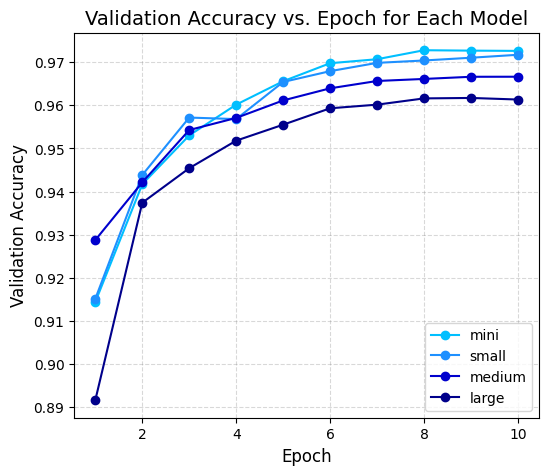

In [10]:
grouped = df_main.groupby(["model", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["mini", "small", "medium", "large"]

plt.figure(figsize=(6, 5))
for model_name in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model"] == model_name]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model_name,
            color=color_map[model_name]
        )
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each Model", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

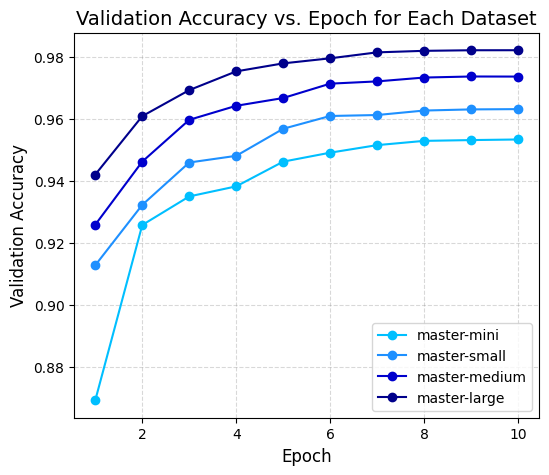

In [11]:
grouped = df_main.groupby(["dataset", "epoch"])["val_accuracy"].mean().reset_index()

ds_order = ["master-mini", "master-small", "master-medium", "master-large"]

plt.figure(figsize=(6, 5))
for ds_name in ds_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["dataset"] == ds_name]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=ds_name,
            color=color_map_ds[ds_name]
        )
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each Dataset", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

In [12]:
# for each model, dataset combination select only row with lowets val_accuracy
best_rows = df_main.loc[df_main.groupby(["model", "dataset"])["val_accuracy"].idxmax()]
# sort by model and dataset size
best_rows = best_rows.sort_values(by=["model", "dataset_size"])

In [13]:
best_rows

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model,dataset_size
87,8,0.129494,0.325356,0.948068,0.947828,0.944398,0.955533,0.949933,0.988129,master-mini,large,10000000
118,9,0.117897,0.266400,0.955345,0.955378,0.962973,0.947499,0.955174,0.992279,master-small,large,20000000
108,9,0.083267,0.218307,0.967362,0.967373,0.969658,0.967040,0.968347,0.993586,master-medium,large,50000000
77,8,0.064789,0.155644,0.976540,0.976544,0.975577,0.977273,0.976424,0.996607,master-large,large,100000000
69,10,0.070415,0.355786,0.952933,0.952962,0.956482,0.952026,0.954249,0.986787,master-mini,medium,10000000
49,10,0.063418,0.277307,0.964064,0.964053,0.962070,0.966538,0.964299,0.991394,master-small,medium,20000000
97,8,0.056065,0.191640,0.971529,0.971590,0.975017,0.969698,0.972350,0.995258,master-medium,medium,50000000
138,9,0.048931,0.146168,0.978866,0.978861,0.979446,0.978010,0.978727,0.997060,master-large,medium,100000000
38,9,0.056662,0.292278,0.957890,0.958066,0.965445,0.952414,0.958885,0.990471,master-mini,mini,10000000
147,8,0.052861,0.195896,0.967332,0.967328,0.966610,0.968393,0.967501,0.995104,master-small,mini,20000000


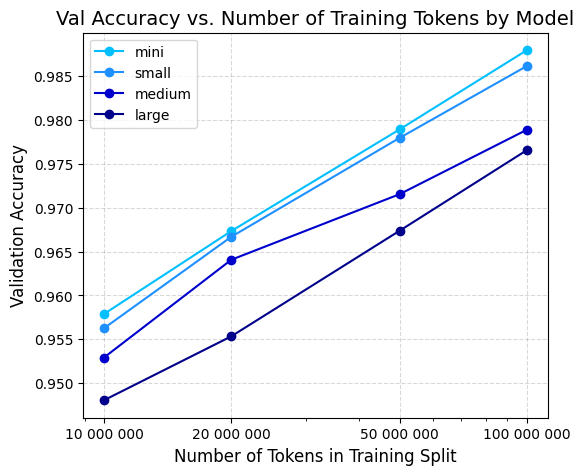

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Compute the mean val_loss per model and dataset size
grouped = best_rows.groupby(["model", "dataset_size"])["val_accuracy"].mean().reset_index()

plt.figure(figsize=(6, 5))

model_order = ["mini", "small", "medium", "large"]
# Plot validation loss curves per model
for model_name in model_order:
    model_data = grouped[grouped["model"] == model_name]
    if not model_data.empty:
        plt.plot(
            model_data["dataset_size"],
            model_data["val_accuracy"],
            marker="o",
            label=model_name,
            color=color_map[model_name]
        )

# Add vertical lines at each unique dataset size
unique_sizes = sorted(grouped["dataset_size"].unique())
# for size in unique_sizes:
#     plt.axvline(size, color='gray', linestyle='--', alpha=0.3)

# Set x-axis to log scale
plt.xscale("log")

# Formatter to insert spaces as thousand separators
def space_formatter(x, _):
    return f"{int(x):,}".replace(",", " ")

plt.gca().xaxis.set_major_formatter(FuncFormatter(space_formatter))
plt.xticks(unique_sizes, labels=[space_formatter(size, None) for size in unique_sizes])

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Tokens in Training Split", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Val Accuracy vs. Number of Training Tokens by Model", fontsize=14)
plt.legend(loc='upper left', fontsize=10)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')

plt.show()


In [15]:
mapping = {"mini": 50_000_000, "small": 100_000_000, "medium": 170_000_000, "large": 340_000_000}

In [16]:
best_rows["model_size"] = best_rows["model"].map(mapping)

In [17]:
best_rows

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model,dataset_size,model_size
87,8,0.129494,0.325356,0.948068,0.947828,0.944398,0.955533,0.949933,0.988129,master-mini,large,10000000,340000000
118,9,0.117897,0.266400,0.955345,0.955378,0.962973,0.947499,0.955174,0.992279,master-small,large,20000000,340000000
108,9,0.083267,0.218307,0.967362,0.967373,0.969658,0.967040,0.968347,0.993586,master-medium,large,50000000,340000000
77,8,0.064789,0.155644,0.976540,0.976544,0.975577,0.977273,0.976424,0.996607,master-large,large,100000000,340000000
69,10,0.070415,0.355786,0.952933,0.952962,0.956482,0.952026,0.954249,0.986787,master-mini,medium,10000000,170000000
49,10,0.063418,0.277307,0.964064,0.964053,0.962070,0.966538,0.964299,0.991394,master-small,medium,20000000,170000000
97,8,0.056065,0.191640,0.971529,0.971590,0.975017,0.969698,0.972350,0.995258,master-medium,medium,50000000,170000000
138,9,0.048931,0.146168,0.978866,0.978861,0.979446,0.978010,0.978727,0.997060,master-large,medium,100000000,170000000
38,9,0.056662,0.292278,0.957890,0.958066,0.965445,0.952414,0.958885,0.990471,master-mini,mini,10000000,50000000
147,8,0.052861,0.195896,0.967332,0.967328,0.966610,0.968393,0.967501,0.995104,master-small,mini,20000000,50000000


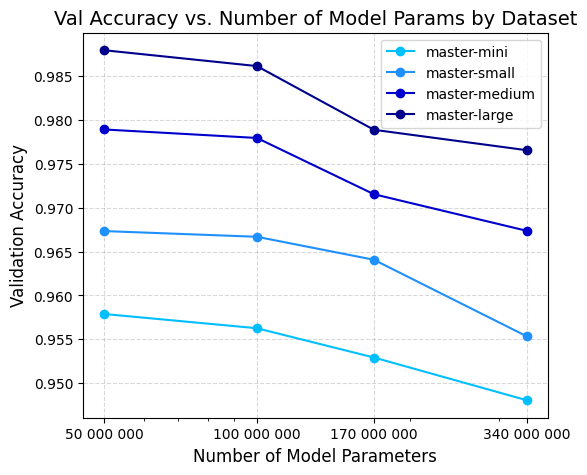

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# Compute the mean val_accuracy per model and dataset size
grouped = best_rows.groupby(["dataset", "model_size"])["val_accuracy"].mean().reset_index()

plt.figure(figsize=(6, 5))
ds_order = ["master-mini", "master-small", "master-medium", "master-large"]
# Plot validation accuracy curves per model
for ds in ds_order:
    model_data = grouped[grouped["dataset"] == ds]
    if not model_data.empty:
        plt.plot(
            model_data["model_size"],
            model_data["val_accuracy"],
            marker="o",
            label=ds,
            color=color_map_ds[ds]
        )

# Unique model sizes for ticks
unique_sizes = sorted(grouped["model_size"].unique())

# Set log scale
plt.xscale("log")

# Force x-ticks only at model sizes
plt.xticks(unique_sizes, [f"{int(x):,}".replace(",", " ") for x in unique_sizes])

# Optionally, disable minor ticks completely
plt.gca().xaxis.set_minor_formatter(NullFormatter())

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Model Parameters", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Val Accuracy vs. Number of Model Params by Dataset", fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')

plt.show()
